# Introduction

Traffic congestion represents one of the most significant challenges in the U.S, leading to the wasted time, money, and energy every year. Congestion alone results in the excessive consumption of millions of gallons of fuel annually. This situation has three key consequences: billions of dollars are wasted on gasoline, increased emissions exacerbate climate change, and commuters losing time that could be devoted to more productive activities.

# Questions

The main questions I would like the answer using this dataset is: 
- Which urban areas wasted the most fuel?

- How has wasted fuel changed over time across different city sizes?

- What patterns are there in short-term vs. long-term congestion trends?

- What solutions could best reduce wasted fuel due to congestion?

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
table = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\Book(Sheet1).csv")

# Introduce the data: 

- urban_area: multiple regions in the United States

- Population_group: the amount of people in those urban areas 

- 1982-2020: the years and how much fuel was wasted that year

- Short_term_percentage (2015 to 2020): The percentage change in wasted fuel

- Short_term_rank (2015 to 2020): A ranking of urban areas based on their short-term percentage change

- Long_term_percentage (1982 to 2020): The percentage changed over a much longer period

- Long_term_rank (1982 to 2020): A ranking of urban areas based on their long-term change 


In [5]:
table.head()

,Urban_area,population_group,(R) 1982,(R) 1985,(R) 1990,(R) 1991,(R) 1992,(R) 1993,(R) 1994,(R) 1995,...,(R) 2015,(R) 2016,(R) 2017,2018,2019,2020,short_term_percentage,short_term_rank,long_term_percentage,long_term_rank
0,"Akron, OH",Medium,0.9,1.4,3.0,3.4,4.2,4.8,5.1,5.3,...,6.5,6.6,6.6,6.7,6.7,4.7,-27.6,18.0,427.2,27.0
1,"Albany-Schenectady, NY",Medium,0.6,0.8,1.4,1.5,1.6,1.6,1.8,1.9,...,5.2,5.3,5.3,5.8,6.2,4.2,-19.7,7.0,623.4,14.0
2,"Albuquerque, NM",Medium,2.0,2.3,3.4,3.7,4.0,4.5,4.9,5.5,...,9.0,9.2,9.1,8.9,9.1,4.3,-52.7,77.0,118.1,86.0
3,"Allentown-Bethlehem, PA-NJ",Medium,1.2,1.4,2.1,2.3,2.6,3.0,3.5,4.0,...,5.7,5.7,5.8,6.1,5.7,2.9,-49.1,63.0,141.5,79.0
4,"Anchorage, AK",Small,0.4,0.5,0.9,1.0,1.1,1.2,1.3,1.4,...,2.7,2.7,2.9,2.8,2.7,1.2,-56.4,86.0,219.9,59.0


# Pre-processing the dataset

The goals of my pre-process steps are to clean up the percentage columns and to group the population size 

In [6]:
table["short_term_percentage"] = (
    table["short_term_percentage"].astype(str).str.replace(",", "").astype(float)
)
table["long_term_percentage"] = (
    table["long_term_percentage"].astype(str).str.replace(",", "").astype(float)
)

years = [col for col in table.columns if col.startswith("(R)") or col.isdigit()]
table_grouped = table.groupby("population_group")[years].mean().T
table.head()

,Urban_area,population_group,(R) 1982,(R) 1985,(R) 1990,(R) 1991,(R) 1992,(R) 1993,(R) 1994,(R) 1995,...,(R) 2015,(R) 2016,(R) 2017,2018,2019,2020,short_term_percentage,short_term_rank,long_term_percentage,long_term_rank
0,"Akron, OH",Medium,0.9,1.4,3.0,3.4,4.2,4.8,5.1,5.3,...,6.5,6.6,6.6,6.7,6.7,4.7,-27.6,18.0,427.2,27.0
1,"Albany-Schenectady, NY",Medium,0.6,0.8,1.4,1.5,1.6,1.6,1.8,1.9,...,5.2,5.3,5.3,5.8,6.2,4.2,-19.7,7.0,623.4,14.0
2,"Albuquerque, NM",Medium,2.0,2.3,3.4,3.7,4.0,4.5,4.9,5.5,...,9.0,9.2,9.1,8.9,9.1,4.3,-52.7,77.0,118.1,86.0
3,"Allentown-Bethlehem, PA-NJ",Medium,1.2,1.4,2.1,2.3,2.6,3.0,3.5,4.0,...,5.7,5.7,5.8,6.1,5.7,2.9,-49.1,63.0,141.5,79.0
4,"Anchorage, AK",Small,0.4,0.5,0.9,1.0,1.1,1.2,1.3,1.4,...,2.7,2.7,2.9,2.8,2.7,1.2,-56.4,86.0,219.9,59.0


# This is the categorizes in my dataset

In [7]:
table.dtypes

Urban_area                object
population_group          object
(R) 1982                 float64
(R) 1985                 float64
(R) 1990                 float64
(R) 1991                 float64
(R) 1992                 float64
(R) 1993                 float64
(R) 1994                 float64
(R) 1995                 float64
(R) 1996                 float64
(R) 1997                 float64
(R) 1998                 float64
(R) 1999                 float64
(R) 2000                 float64
(R) 2001                 float64
(R) 2002                 float64
(R) 2003                 float64
(R) 2004                 float64
(R) 2005                 float64
(R) 2006                 float64
(R) 2007                 float64
(R) 2008                 float64
(R) 2009                 float64
(R) 2010                 float64
(R) 2011                 float64
(R) 2012                 float64
(R) 2013                 float64
(R) 2014                 float64
(R) 2015                 float64
(R) 2016  

In [9]:
table.columns

Index(['Urban_area', 'population_group', '(R) 1982', '(R) 1985', '(R) 1990',
       '(R) 1991', '(R) 1992', '(R) 1993', '(R) 1994', '(R) 1995', '(R) 1996',
       '(R) 1997', '(R) 1998', '(R) 1999', '(R) 2000', '(R) 2001', '(R) 2002',
       '(R) 2003', '(R) 2004', '(R) 2005', '(R) 2006', '(R) 2007', '(R) 2008',
       '(R) 2009', '(R) 2010', '(R) 2011', '(R) 2012', '(R) 2013', '(R) 2014',
       '(R) 2015', '(R) 2016', '(R) 2017', '2018', '2019', '2020',
       'short_term_percentage', 'short_term_rank', 'long_term_percentage',
       'long_term_rank'],
      dtype='object')

In [10]:
table.shape

(108, 39)

# This describes my dataset

In [8]:
table.describe

<bound method NDFrame.describe of                         Urban_area population_group  (R) 1982  (R) 1985  \
0                        Akron, OH           Medium       0.9       1.4   
1           Albany-Schenectady, NY           Medium       0.6       0.8   
2                  Albuquerque, NM           Medium       2.0       2.3   
3       Allentown-Bethlehem, PA-NJ           Medium       1.2       1.4   
4                    Anchorage, AK            Small       0.4       0.5   
..                             ...              ...       ...       ...   
103  Very large urban area average       Very large      34.9      42.0   
104       Large urban area average            Large       3.3       4.6   
105      Medium urban area average           Medium       1.6       1.9   
106       Small urban area average            Small       0.4       0.5   
107                            NaN              NaN       NaN       NaN   

     (R) 1990  (R) 1991  (R) 1992  (R) 1993  (R) 1994  (R) 1995  

In [12]:
table['Urban_area']

0                          Akron, OH
1             Albany-Schenectady, NY
2                    Albuquerque, NM
3         Allentown-Bethlehem, PA-NJ
4                      Anchorage, AK
                   ...              
103    Very large urban area average
104         Large urban area average
105        Medium urban area average
106         Small urban area average
107                              NaN
Name: Urban_area, Length: 108, dtype: object

# This is a visualization of the annuel fuel wasted in 2020 during the pandemic

The scatter chart below compares the short-term congestion ranking with the wasted fuel in 2020 across urban areas within the United States. Based on this chart the majority of urban areas wasted only a little of fuel, but some of the large metro areas wasted over 100 million gallons just in 2020. This visualization revealed that, while most U.S. cities experienced a significant reduction in fuel waste in 2020 due to decreased travel during the pandemic, a few large urban areas still wasted substantial amounts of fuel. This situation demonstrates the ongoing challenge of congestion in major metropolitan areas and highlights that even in unusual circumstances like COVID-19, showing that the economic and environmental costs of traffic congestion will not be easy to eliminate.

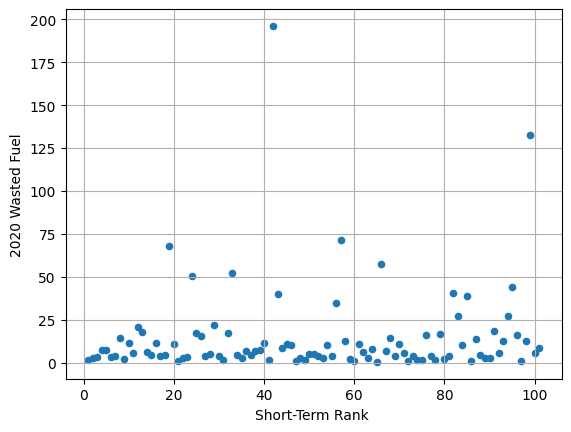

In [8]:
table.plot(x='short_term_rank', y='2020', kind='scatter')
plt.xlabel("Short-Term Rank ")
plt.ylabel("2020 Wasted Fuel")
plt.grid(True)
plt.show()

# Possible Solution 1: Investment in public transportation

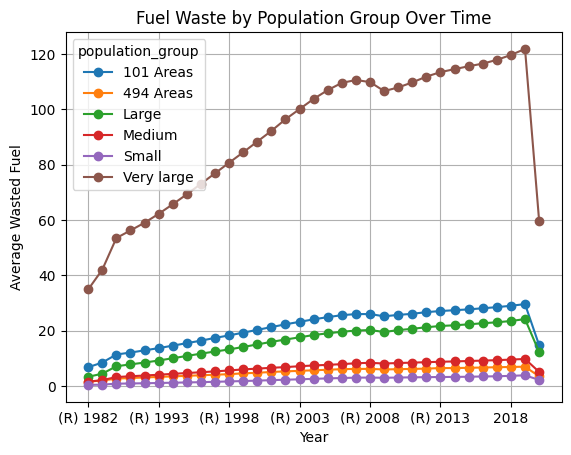

In [13]:
table_grouped.plot(marker="o")
plt.title("Fuel Waste by Population Group Over Time")
plt.xlabel("Year")
plt.ylabel("Average Wasted Fuel")
plt.grid(True)
plt.show()

This visualization answers the question how has wasted fuel changed over time across different sizes, you can see that over time more and more fuel is wasted over time except for the pandemic. As you can see from the previous visualization urban areas are the major contributors to annuel wasted gas due to congestion. Investing in public could be a possible solution for the larger urban area due to their large population size. In many crowded cities all over the world public transportation is a must for them and implementing that within the united states could reduce the annuel amount of gas wasted significatnly. 

# Possible Solution 2: Increased remote working and or carpooling

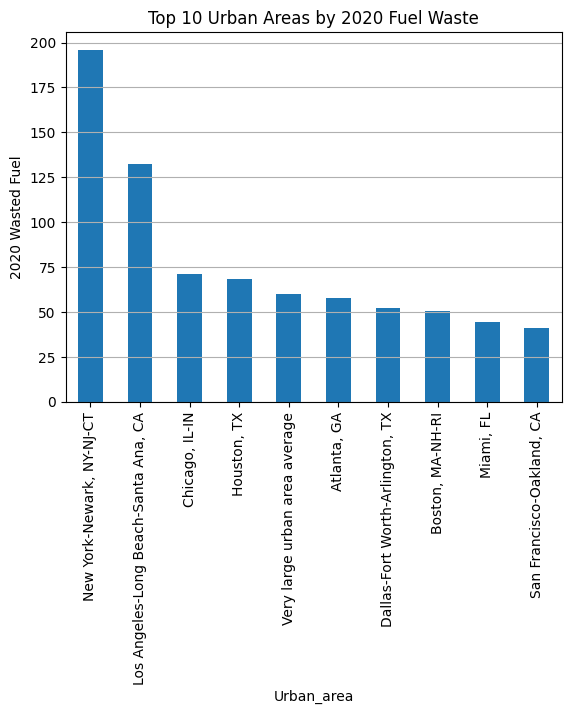

In [8]:
top10 = table.nlargest(10, "2020")[["Urban_area", "2020"]].set_index("Urban_area")

top10.plot(kind="bar", legend=False)
plt.title("Top 10 Urban Areas by 2020 Fuel Waste")
plt.ylabel("2020 Wasted Fuel")
plt.grid(axis="y")
plt.show()

In this visualization it answers the question of which areas wasted the most amount of fuel due to congestion. Compared to the smaller rural areas, large urban areas waste the most fuel. With work being their number one reason to drive, one possible solution could be if these large urban areas could increase carpooling and or have more of their population work remote. 

# Possible Solution 3: Environmental enforcement

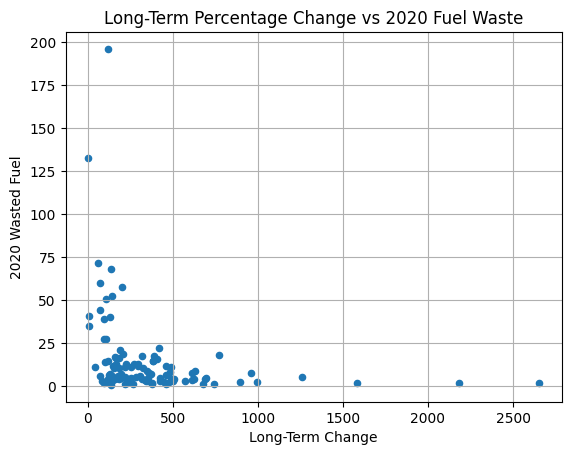

In [14]:
table.plot.scatter(
    x="long_term_percentage", y="2020",
    title="Long-Term Percentage Change vs 2020 Fuel Waste"
)
plt.xlabel("Long-Term Change")
plt.ylabel("2020 Wasted Fuel")
plt.grid(True)
plt.show()


This last visual answers the questions of what patterns are there in short-term vs. long-term congestion trends. The first visualization I made was the short-term section so comparing theses two visualization you can see the patterns. A possible solution after see the patterns is to adopt a more environmentally conscious approach while placing a strong emphasis on efficiency. By prioritizing sustainable practices and optimizing resource use, we can reduce our ecological footprint and improve overall productivity.

# StoryTelling: 

For this project I choose the Annual Wasted Fuel Due to Congestion dataset from the bureau of transporation statistics. I believe that this topic is important because americans should to be aware of how much resources and money are wasted on just congestion on the road. In the dataset I use it documents the amount of wasted fuel per year (from 1982 to 2020), the area, and the type of population group. This project has four main visualizations, the first one being the amount of fuel wasted during the pandemic to demonstrate how even during a crisis that fuel was still wasted due to congestion. Next I made a visualization of fuel waste by population groups over time to show that a possile solution to wasted fuel could be an investment in public transportation for large urban areas. Next I made a visualization of the top ten urban areas and how much fuel they wasted, and the top reason for congestion in most of these areas is work. From my chart I explained how a possible solution to this could be to increase remote working and or carpooling togther. In my last chart I compared long-term percentage change to the 2020 fuel waste. This last chart directly compared to my first visualization but showing the long term change this time, the possible solution I made from this chart is adopting a more environmentlly conscious approach to transportation. 

# Impact

One way my visualizations could cause harm is by having possible missing data. It is nearly impossible to know exact amount of fuel that is wasted due to congestion and this could greatly impact my data causing my conclusions to be off. Some perspectives that could be missing from my data could be why so many people are on the road, my top assumtion was for work but the congestion could be from many different reasons. 